In [3]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv(r'C:\Users\koluwasere\Documents\Python\General Python Learning\Machine Learning Models\DataStore\GDPperCapitaUK.csv')

# Convert GDP values from USD to GBP using a multiplication factor of 1.26 (26% increase as of 28/08/2023: £1 = $1.26)
df['GDP per capita (current US$)'] = (df['GDP per capita (current US$)'] * 1.26)

df.head(63)

,Year,GDP per capita (current US$)
0,1960,1760.969527
1,1961,1855.206079
2,1962,1922.477657
3,1963,2032.955761
4,1964,2202.843123
...,...,...
58,2018,54565.948458
59,2019,53861.321380
60,2020,50801.205319
61,2021,58698.230926


In [280]:
# Rename the column representing GDP to 'Income' for clarity
df = df.rename(columns={'GDP per capita (current US$)':'Income'})

df.head(2)

,Year,Income
0,1960,1760.969527
1,1961,1855.206079


In [281]:
# Calculate descriptive statistics for the 'Income' column, including mean, standard deviation, min, max, and IQR
df['Income'].describe()

count       63.000000
mean     26889.302033
std      21387.206973
min       1760.969527
25%       5315.592701
50%      24061.263912
75%      50847.729521
max      63552.169296
Name: Income, dtype: float64

In [282]:
# Check for missing values in the dataset to ensure data integrity
df.info()
# df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    63 non-null     int64  
 1   Income  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [283]:
# Round the 'Income' values to two decimal places
df['Income'] = df['Income'].round(2)

df.head(2)

,Year,Income
0,1960,1760.97
1,1961,1855.21


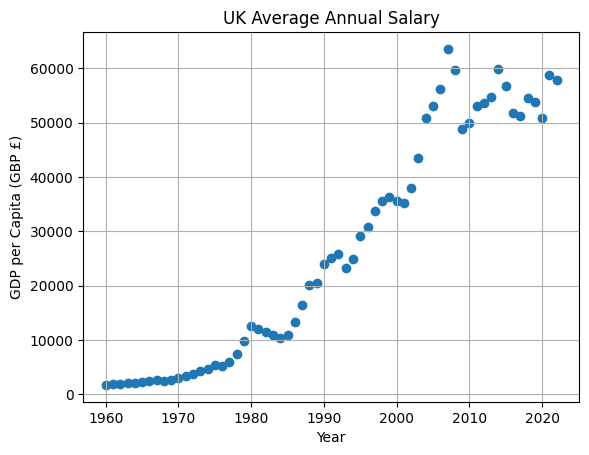

In [284]:
# Define the independent variable 'Year' and the dependent variable 'Income'
x = df['Year']
y = df['Income']

# Set labels for the x and y axes and provide a title for the scatter plot
plt.title('UK Average Annual Salary')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (GBP £)')

# Add grid lines to the plot
plt.grid(True)

# Create a scatter plot to visualize the relationship between Year and Income
plt.scatter(x,y)

In [294]:
# Initiate the linear regression model 'lri' from the sklearn library
lri = LinearRegression()

# Train the LinearRegression model using the historical Year and Income data
lri.fit(df[['Year']].values, df['Income'])

LinearRegression()

<Axes: ylabel='Income'>

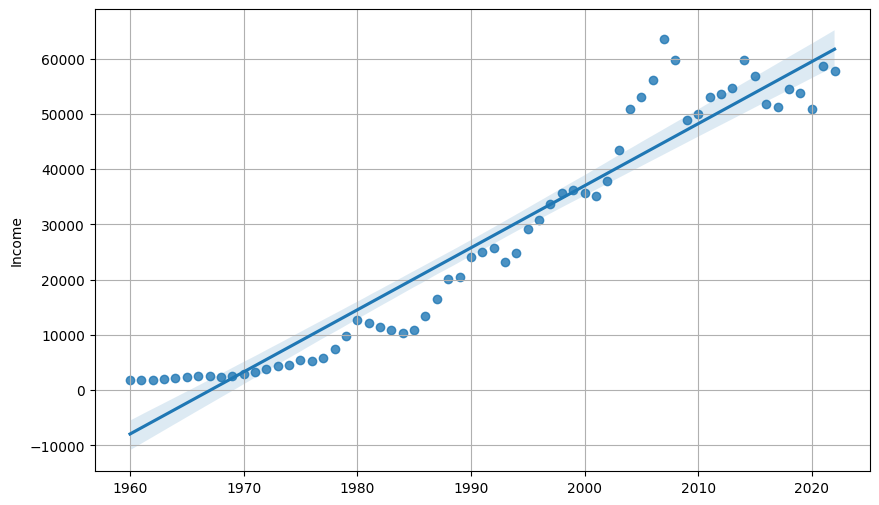

In [296]:
# Create a larger plot area for the following regplot & adding grid lines to the new plot area
plt.figure(figsize=(10,6))
plt.grid(True)

# Create a regplot using seaborn to visualize the linear regression line on the scatter plot
sns.regplot(data=df, x=x, y=y)

In [295]:
# Using the trained model to predict the UK's average annual salary for a user inputted year
print(lri.predict([[2033]]))

[74048.22689196]
